# Indice de calidad de aire

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carpeta = r'./Original_dataset'

In [3]:
# fort para leer cada archivo de la carpeta
dataframes = []

for  archivo in os.listdir(carpeta):
    df = pd.read_csv(carpeta +'/'+ archivo)
    columnas_primarias = ['Fecha','Hora']
    zonas = ['Noroeste','Noreste','Centro','Suroeste','Sureste']
    for zona in zonas:
        columnas_primarias.append(f'{zona} PM10')
        columnas_primarias.append(f'{zona} monóxido de carbono')
    df_interes = df[columnas_primarias]
    dataframes.append(df_interes)


df_comb = pd.concat(dataframes, ignore_index= True, axis=0)

df_comb.to_csv('Conviando.scv',index=False) # guardando los datos en un nuevo archivo



In [4]:
df_comb

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
0,01/01/2016,1,108,13.0,117,16.0,107,16.0,67,9.0,107.0,11.0
1,01/01/2016,2,110,13.0,122,18.0,107,17.0,70,9.0,107.0,12.0
2,01/01/2016,3,113,14.0,124,19.0,109,18.0,76,10.0,108.0,13.0
3,01/01/2016,4,115,14.0,126,19.0,110,19.0,83,10.0,107.0,14.0
4,01/01/2016,5,116,15.0,127,20.0,112,17.0,90,11.0,108.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69318,29/06/2024,13,39,8.0,39,7.0,35,8.0,23,7.0,26.0,6.0
69319,29/06/2024,14,39,8.0,39,7.0,35,8.0,23,7.0,28.0,6.0
69320,29/06/2024,15,39,7.0,39,6.0,35,7.0,23,6.0,28.0,6.0
69321,29/06/2024,16,36,6.0,39,6.0,35,7.0,24,6.0,28.0,5.0


In [5]:
df = pd.read_csv('Conviando.scv')

In [6]:
df.describe()

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69313.000000,69264.000000
mean,12.499834,67.921296,1.977954,74.721031,3.127483,58.138078,2.607762,41.921931,0.597598,57.901663,1.633302
std,6.921911,25.043909,20.276814,31.815297,20.304285,23.530954,19.524339,19.556672,19.885728,40.724041,20.484189
min,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,7.000000,48.000000,4.000000,51.000000,4.000000,40.000000,4.000000,30.000000,3.000000,40.000000,4.000000
50%,12.000000,65.000000,5.000000,77.000000,5.000000,55.000000,5.000000,40.000000,4.000000,60.000000,5.000000
75%,18.000000,88.000000,7.000000,102.000000,8.000000,74.000000,8.000000,52.000000,5.000000,84.000000,7.000000
max,24.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [7]:
# asignar a -99 como valor nulo 

df.replace(-99, np.nan , inplace = True)

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Fecha'] = pd.to_datetime(df['Fecha'],format='%d/%m/%Y')

In [8]:
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

In [9]:
# Agregando hora a la fecha
df['Hora']-= 1
df['Fecha_Hora'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'].astype(str)+':00:00')

In [10]:
df.set_index('Fecha_Hora',inplace = True)

In [11]:
df.head()

,Fecha,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
Fecha_Hora,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
2016-01-01 01:00:00,2016-01-01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2016-01-01 02:00:00,2016-01-01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
2016-01-01 03:00:00,2016-01-01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
2016-01-01 04:00:00,2016-01-01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0


In [94]:
df.sort_index(inplace=True)

In [12]:
short_name = {
    'Noroeste PM10': 'NO-PM10',
    'Noroeste monóxido de carbono': 'NO-CO',
    'Noreste PM10': 'NE-PM10',
    'Noreste monóxido de carbono': 'NE-CO',
    'Centro PM10': 'CE-PM10',
    'Centro monóxido de carbono': 'CE-CO',
    'Suroeste PM10': 'SO-PM10',
    'Suroeste monóxido de carbono': 'SO-CO',
    'Sureste PM10': 'SE-PM10',
    'Sureste monóxido de carbono': 'SE-CO',
}

df.rename(columns=short_name,inplace=True)

In [13]:
nulos_por_año = df.isnull().groupby(df.index.year).sum()

,Fecha,Hora,NO-PM10,NO-CO,NO-PM10,NO-CO,NO-PM10,NO-CO,NO-PM10,NO-CO,NO-PM10,NO-CO
Fecha_Hora,,,,,,,,,,,,
2016,0,0,0,366,0,366,0,366,0,366,31,366
2017,0,0,2,370,67,363,0,367,46,362,883,369
2018,0,0,0,364,179,364,0,364,0,364,719,370
2019,0,0,47,316,21,307,0,307,36,307,314,301
2020,0,0,26,374,43,373,5,375,22,379,321,375
2021,0,0,0,343,76,271,0,253,107,297,120,353
2022,0,0,0,318,39,330,0,291,48,348,201,368
2023,0,0,0,168,0,162,19,72,29,204,75,198
2024,0,0,0,59,0,59,0,59,0,59,10,59


In [14]:
nulos_por_mes = df.isnull().groupby([df.index.year,df.index.month]).sum()

In [15]:
nulos_por_mes

Fecha  Hora  NO-PM10  NO-CO  NE-PM10  NE-CO  CE-PM10  \
Fecha_Hora Fecha_Hora                                                         
2016       1               0     0        0     30        0     30        0   
           2               0     0        0     30        0     30        0   
           3               0     0        0     30        0     30        0   
           4               0     0        0     30        0     30        0   
           5               0     0        0     30        0     30        0   
...                      ...   ...      ...    ...      ...    ...      ...   
2024       2               0     0        0     28        0     28        0   
           3               0     0        0      0        0      0        0   
           4               0     0        0      0        0      0        0   
           5               0     0        0      0        0      0        0   
           6               0     0        0      0        0      0        0   

                       CE-CO  SO-PM10  SO-CO  SE-PM10  SE-CO  
Fecha_Hora Fecha_Hora                                         
2016       1              30        0     30        0     30  
           2              30        0     30        0     30  
           3              30        0     30        5     30  
           4              30        0     30        0     30  
           5              30        0     30        0     30  
...                      ...      ...    ...      ...    ...  
2024       2              28        0     28        0     28  
           3               0        0      0        0      0  
           4               0        0      0        0      0  
           5               0        0      0       10      0  
           6               0        0      0        0      0  

[95 rows x 12 columns]

In [16]:
nulos_por_mes.loc(1)

In [17]:
df.isnull().sum()

Fecha         0
Hora          0
NO-PM10      75
NO-CO      2678
NE-PM10     425
NE-CO      2595
CE-PM10      24
CE-CO      2454
SO-PM10     288
SO-CO      2686
SE-PM10    2674
SE-CO      2759
dtype: int64

In [ ]:
#%pip install missingno

In [19]:
import missingno as msno

<Axes: >

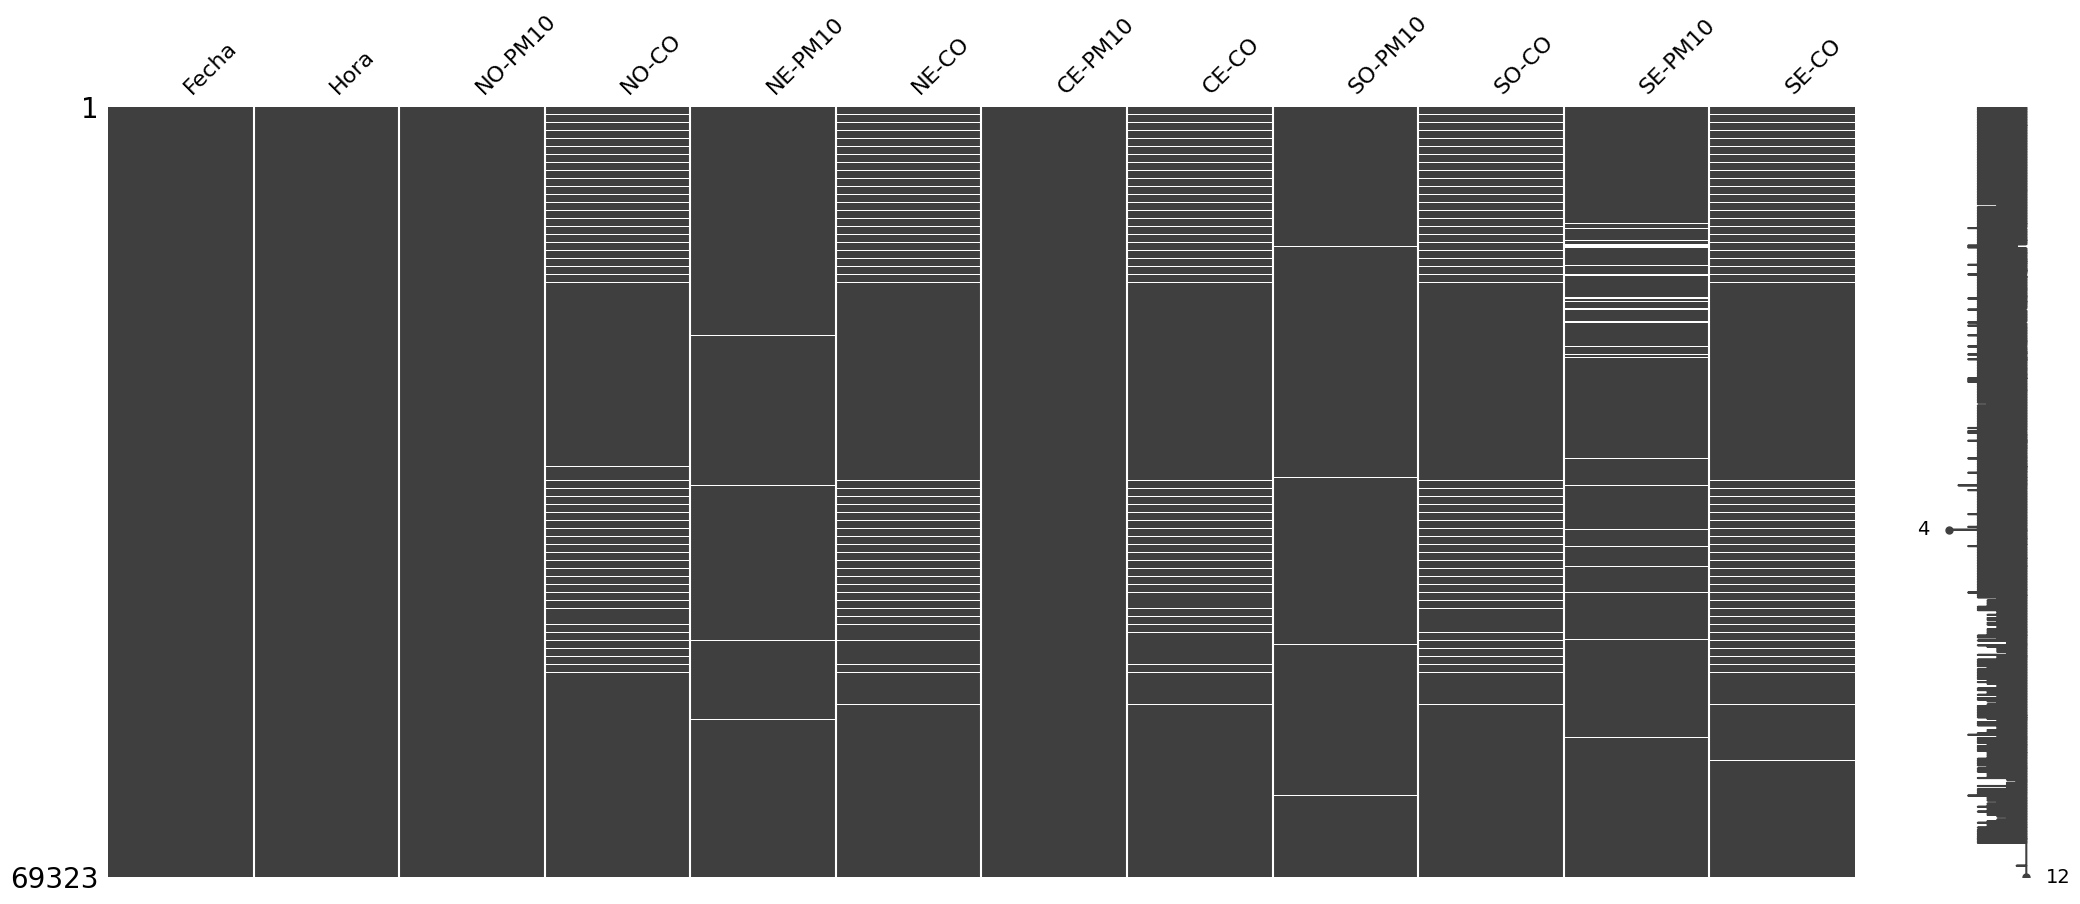

In [20]:
msno.matrix(df)

In [ ]:
plt.scatter(df.index,df['Noroeste PM10'])

In [ ]:
plt.scatter(df.index,df['Noroeste PM10'])


In [23]:
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    plt.figure(figsize=(15, 5))
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    for zone in zones:
        column = f"{zone}-{variable}"
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
        else:
            print(f"Columna {column} no encontrada en el DataFrame")
    plt.xlabel('Fecha_Hora')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

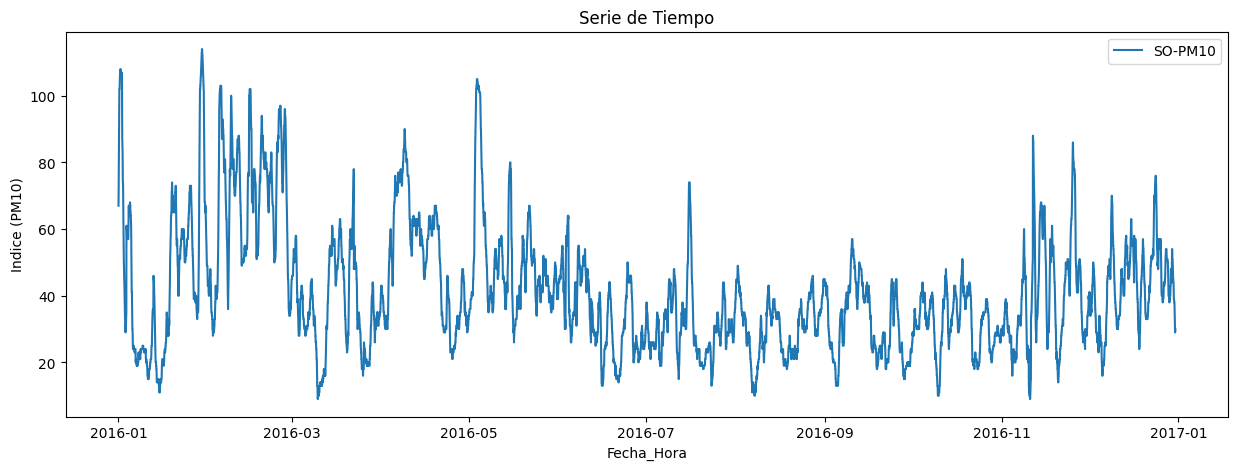

In [26]:
plot_time_series(df,'PM10',['SO'],'Indice (PM10)','Serie de Tiempo', start_date='2016-01-01',end_date='2016-12-30')